--2020-12-08 21:17:48--  https://uta.instructure.com/courses/61673/files/10505095/preview?verifier=1qoqyIxNj5MjnRrfNGQsUpWHAQs0TDZiyDLfTKps
Resolving uta.instructure.com (uta.instructure.com)... 34.224.181.213, 52.21.165.220, 54.145.38.170
Connecting to uta.instructure.com (uta.instructure.com)|34.224.181.213|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://a13430-10505095.cluster38.canvas-user-content.com/courses/13430~61673/files/13430~10505095/course%20files/public_files/2018-2019_NBA_stats.csv?download=1&inline=1&verifier=1qoqyIxNj5MjnRrfNGQsUpWHAQs0TDZiyDLfTKps [following]
--2020-12-08 21:17:49--  https://a13430-10505095.cluster38.canvas-user-content.com/courses/13430~61673/files/13430~10505095/course%20files/public_files/2018-2019_NBA_stats.csv?download=1&inline=1&verifier=1qoqyIxNj5MjnRrfNGQsUpWHAQs0TDZiyDLfTKps
Resolving a13430-10505095.cluster38.canvas-user-content.com (a13430-10505095.cluster38.canvas-user-content.com)... 52.22.206.196, 3

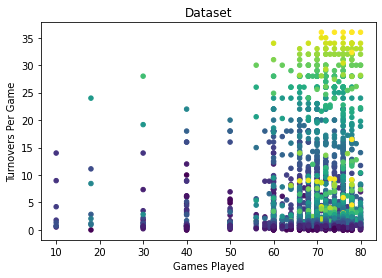

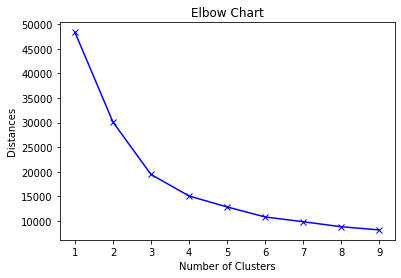


SSE errors for cluster: 1
48354.01193205

SSE errors for cluster: 2
30106.411819150027

SSE errors for cluster: 3
19459.0604899123

K-means labels:

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 2 2 2 2
 2 2 2 2]

                       Cluster ID
Player                           
James Harden                    1
Giannis Antetokounmpo           1
Stephen Curry                   1
Karl-Anthony Towns              1
Anthony Davis                   1
.

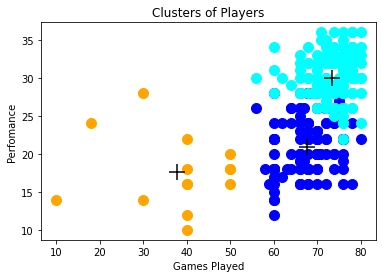

In [4]:
!wget -O 2018-2019_NBA_Stats.csv https://uta.instructure.com/courses/61673/files/10505095/preview?verifier=1qoqyIxNj5MjnRrfNGQsUpWHAQs0TDZiyDLfTKps

import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from sklearn import cluster
from sklearn.cluster import KMeans


#Read from the csv file and return a Pandas DataFrame.
stats_file = '/content/2018-2019_NBA_Stats.csv'
nba = pd.read_csv(io.FileIO(stats_file))
nba

#pass the value from column 3 through 12 
frame=nba.iloc[:,3:12].values

#plot the points from the dataset
plt.title('Dataset')  
ax  = plt.gca()
columns = nba.columns
for col in columns[4:]:
    nba.plot.scatter(x=columns[3], y=col, c=col, colormap='viridis',
        ax=ax, colorbar=False)
plt.show()

#drop the columns that are not numeric
data = nba.drop('Position',axis =1 )
data = nba.drop('Team',axis =1 )
data = nba.drop('Player',axis =1 )

#compute the distances between points 
distances = []
points = range(1,10)
for k in points:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(frame)
    distances.append(kmeans.inertia_)
    

#plot the Elbow Chart
plt.plot(points, distances, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distances')
plt.title('Elbow Chart')
plt.show()

#assign k with optimal value according to Elbow Chart 
sse = {}
for i in range (1, 4):
   k_means = cluster.KMeans(n_clusters=i, max_iter=50, random_state=1)
   k = k_means.fit_predict(frame)
   labels = k_means.labels_
   pd.DataFrame(labels, index=nba.Player, columns=['Cluster ID'])
   #print the SSE errors
   sse[i] = k_means.inertia_
   print ("\nSSE errors for cluster:", i)
   print (sse[i])

print ()
print ("K-means labels:\n")
print (k_means.labels_ ) 
#print the clustered data
print ()
print (pd.DataFrame(labels, index=nba.Player, columns=['Cluster ID']))

#compute the centroids
centroids = k_means.cluster_centers_
print (pd.DataFrame(centroids,columns=['Games Played','Minutes Per Game', 'Points Per Game', 'Total Rebounds Per Game', 'Assists Per Game', 'Three Points Made Per Game', 'Steals Per Game','Block Per Game', 'Turnover Per Game']))

#plot the clusters 
plt.scatter(frame[k==0, 0], frame[k==0, 1], s=100, c='blue', label ='Cluster 1')
plt.scatter(frame[k==1, 0], frame[k==1, 1], s=100, c='cyan', label ='Cluster 2')
plt.scatter(frame[k==2, 0], frame[k==2, 1], s=100, c='orange', label ='Cluster 3')
#plt.scatter(frame[k==3, 0], frame[k==3, 1], s=100, c='gray', label ='Cluster 4')

#plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=250, marker='+', c='black', label='Centroids')
plt.title('Clusters of Players')
plt.xlabel('Games Played')
plt.ylabel('Perfomance')
plt.show()









